***We will handle this problem in a structured way. We will be following the table of content given below.***

```
1).Problem Statement
2).Hypothesis Generation
3).Loading Packages and Data 
4).Data Structure and Content
5).Exploratory Data Analysis
6).Univariate Analysis
7).Bivariate Analysis
8).Missing Value Treatment
9).Feature Engineering
10).Encoding Categorical Variables
11).Label Encoding
12).One Hot Encoding
13).PreProcessing Data
14).Modeling
15).Linear Regression
16).Regularized Linear Regression
17).RandomForest
18).XGBoost
19).Summary
```



***1).Problem Statement***

```
Sales Prediction for Big Mart Outlets:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
```



***2).Hypothesis Generation***


```
Item weight might effect a sales of the product.
Sales of the product may be depends on the items fat content.

More Item_Visibility of a particular product may be costlier than other products.

Item type could have an effect on the sales.
Are the items with more MRP have more item outlet sales.

Are the stores which have established earlier have more sales.

Size of the stores could have an effect on the item sales at a particular store.
Location of the stores might depends on the Item outlet sales
.
Are the supermarkets have more sales than others.
```


***Introduction to dataset***
```
Data We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

`Variable	Definition`

Item_Identifier-	Unique Product ID
Item_Weight-	Weight of product
Item_Fat_Content-	Whether the product is low fat or not
Item_visibility-	The % of total display area of all products in a store allocated to the particular product
Item_Type-	The category to which the product belongs.
Item_MRP-	Maximum retail price(list price) of the product.
Outlet_Identifier-	Unique store ID.
Outlet_Establishment_Year-	The year in which store was established.
Outlet_Size-	The size of the store in terms of groud area covered.
Outlet_Location_Type-	The type of city in which the store is located.
Outlet_Type-	Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales-	Sales of the product in the particulat store. This is the outcome variable to be predicted
```



***3).Loading Packages and Data***

```
load the python libary (pandas,numpy,seaborn,matplot)
```


In [14]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  #linear algbra
import matplotlib.pyplot as plt #viz
import seaborn as sns

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (1).csv
Saving Train.csv to Train (1).csv


# New Section

In [97]:
# import data set 
import io
train = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

test = pd.read_csv(io.BytesIO(uploaded['Test.csv']))

***4).Data Structure and Content***


In [98]:
print('test data shape :' ,test.shape)
print('train data shape :',train.shape)

test data shape : (5681, 11)
train data shape : (8523, 12)


***Observations:***

```
This shows that the train and test data is imported successfully.

The train data consists of 8,523 training examples with 12 features.

The test data consists of 5,681 training examples with 11 features
```


**5).Exploratory Data Analysis**

In [99]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [100]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

**Observation:**



```
 Here it clearly visible that all the variables are presented in our train and test dataset that are provide in data dictionary.
```



**5).Exploratory Data Analysis**

In [101]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [103]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

***Numerical Features:***



```
Item_Weight
Item_Visibility
Item_MRP
Item_Outlet_Sales(Target Variable)
Outlet_Establishment_Year
```

**Categorical Features**

```
Item_Identifier
Item_Fat_Content(Ordinal Feature)
Item_Type
Outlet_Itemtifier
Outlet_Size(Ordinal Feature)
Outlet__Location_Type(Ordinal Feature)
Ootlet_Type(Ordinal Feature)
```

***Observations:***
```
There are 4 float type variables, 1 integer type and 7 object type.
We are considering Item_Establishment_Year as a categorical feature because it contains some fixed value but not converting its data type now will consider later.
Item_Fat_Content, Outlet_Size, Outelet_Location_Type and Outlet_Type are ordinal features because these values can be arranged in some order.
```




In [105]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [106]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

**6).Univariate Analysis**

**6.1 Univariate Analysis:Numerical Features**
```
In this section we are going to explore and analyze the numerical features. So let's get start with the statistical information of the data
```



In [107]:
print('Number of trainings examples:', len(data),'\n')
data.describe()

Number of trainings examples: 14204 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



***Observations:***
```
Total count of Item_Weight is 11765 which is less than the length of the training dataset, therefore it may contains some missing values.

The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.

The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.

Most recent store was established in 2009 and the oldest store was established in 1985.

Average sales of items is Rs 1303 and the maximum sale is Rs 13,086.
```



In [108]:
numerical = data.select_dtypes(include = ['int64', 'Int64','float64']).dtypes.index
numerical

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

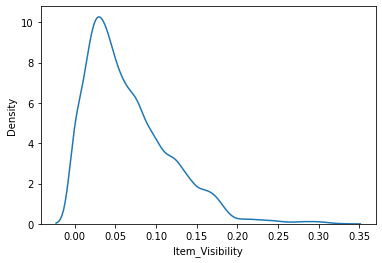

In [109]:

sns.distplot(a=data.Item_Visibility, hist=False)
plt.show()

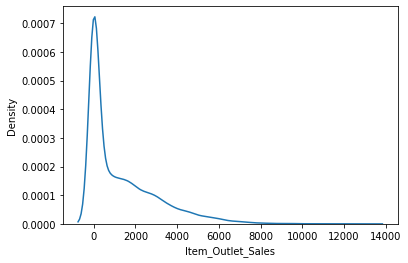

In [110]:
sns.distplot(a=data.Item_Outlet_Sales, hist=False)
plt.show()

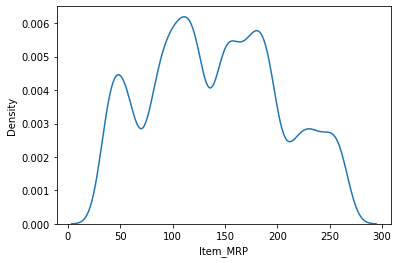

In [111]:
sns.distplot(a=data.Item_MRP, hist=False)
plt.show()

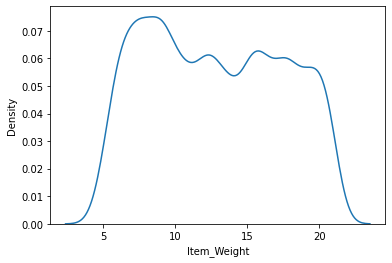

In [112]:
sns.distplot(a=data.Item_Weight, hist=False)
plt.show()

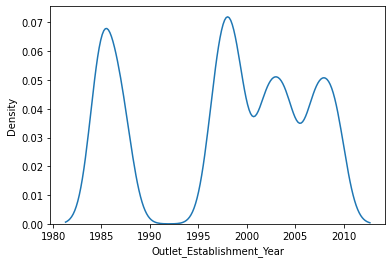

In [113]:
sns.distplot(a=data.Outlet_Establishment_Year, hist=False)
plt.show()


***Observation:***
```

-The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.

-There are some items that are not visible at all and the maximum visibility of the item is 33%.

The price of the items range in between Rs 31 - 265.

The most expensive item in the stores is of Rs 266.89.

Most of the stores are established in year from 1985-1990 and 1995 to 2000.

From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.

Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.


```
***New Hypothesis***

```


Are the items with less visibility having more sales.
```






***6.2 Univariate: Categorical Features***
```
In this section we are going to explore analyze the categorical features, their classes and finding important information from the dataset
```



In [33]:
cat_data=data.select_dtypes(include='object')
cat_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [34]:
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [35]:
def UVA_Categorical(data, cat):
  plt.figure(figsize = (10,6))
  sns.countplot(cat, data = data)
  plt.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plt.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plt.title('Value counts: \n{}'.format(data[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


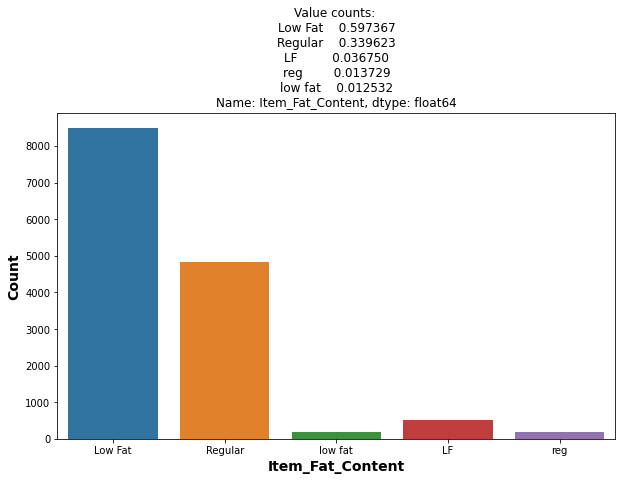

In [36]:
UVA_Categorical(data,'Item_Fat_Content')


Observation:
```

Around 64% of the total items contains low fat while remaining contains regular fat.

Inference:

Low Fat , low fat and lf are all seems to be same as Low Fat there later on we have to rename low fat and LF to Low Fat during preprocessing.
Regular and reg also seems to same fat content, this also required to rename to Regular during preprocessing.
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


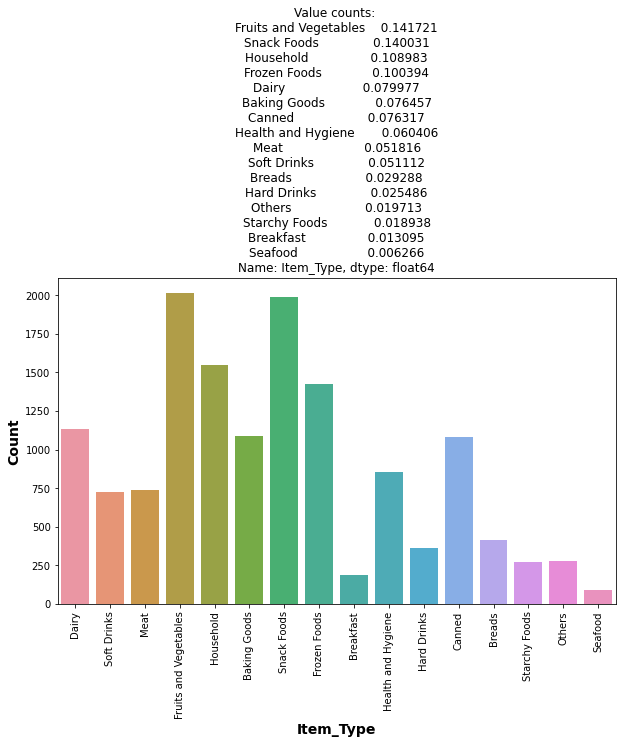

In [37]:
UVA_Categorical(data, 'Item_Type')


**Oservations:**
```

More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
Sale of breakfast and seafood type of items are very less.
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


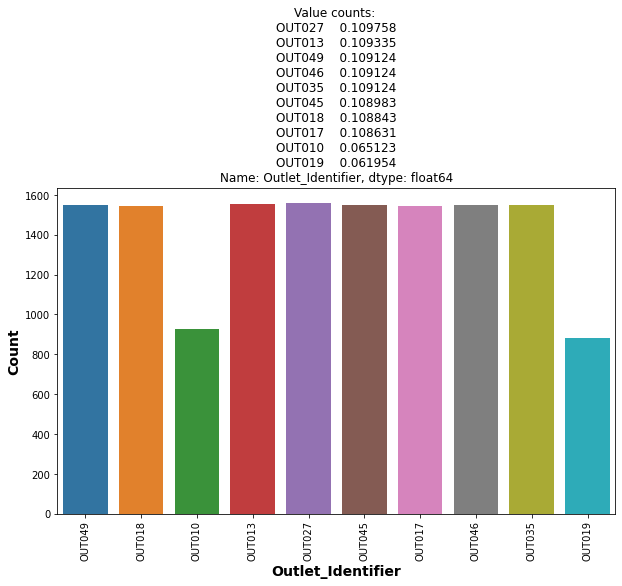

In [38]:
UVA_Categorical(data, 'Outlet_Identifier')

**Observations:**

```
There are total 10 stores.
All the stores are selling almost same number of items except the OUT010 and OUT019 stores
Idea for Bivariate analysis
Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


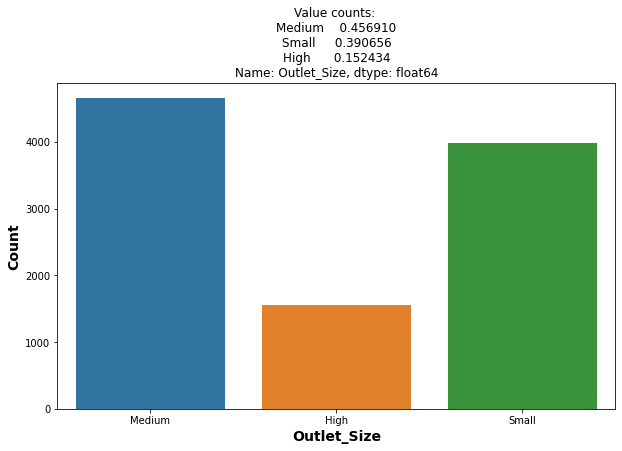

In [39]:
UVA_Categorical(data,'Outlet_Size')


Observations:
```
45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.
New Hypothesis
Are the stores with medium size have high sale than others.
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


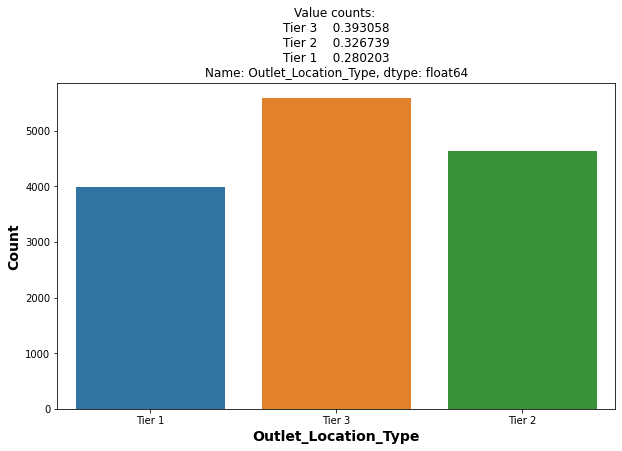

In [40]:
UVA_Categorical(data, 'Outlet_Location_Type')


**Observations:**
```

39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.
New Hypothesis
Are the stores located in Tier 3 cities have more sale than other.
```



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


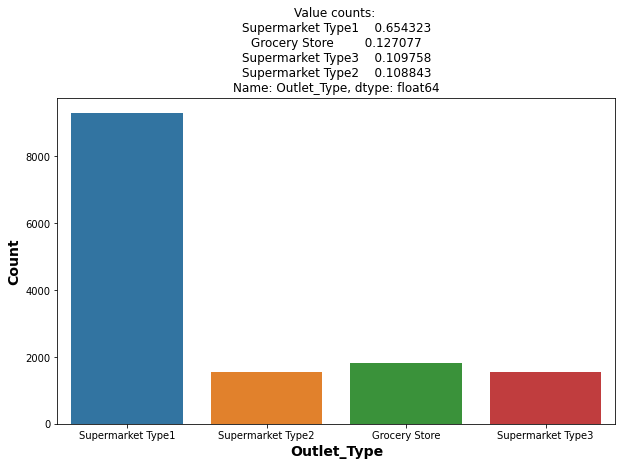

In [41]:
UVA_Categorical(data, 'Outlet_Type')


Observations
```

65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.
New Hypothesis
Are the Supermarket Type 1 type of stores have more sales than other type of stores.
```




**6.3 Missing Values**
```

In this section we are going to check whether our data contains missing values or not.
```



In [42]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

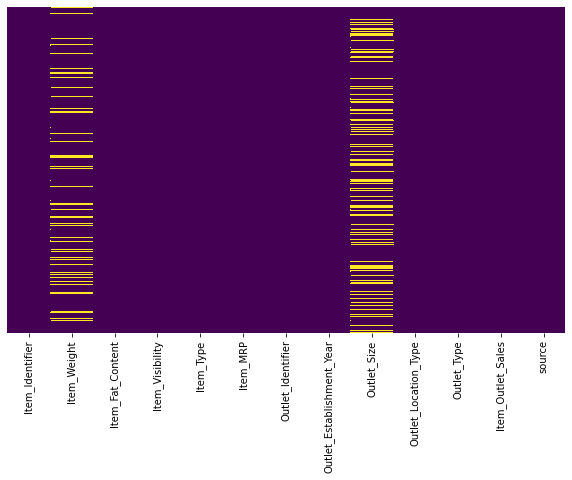

In [43]:
plt.figure(figsize = (10,6))
sns.heatmap(data.isnull(), yticklabels=False,cbar = False,cmap ='viridis')


**Observation:**

```

Yes our dataset contain missing values.
Item_weight and Outlet_Size features contain missing values
```



In [44]:
def missing_percent():
  miss_item_weight = (data['Item_Weight'].isnull().sum()/len(train))*100
  miss_Outlet_Size = (data['Outlet_Size'].isnull().sum()/len(train))*100

  print('% of missing values in Item_Weight: ' + str(miss_item_weight))
  print('% of missing values in Outlet_Size: ' +str(miss_Outlet_Size))

In [45]:
missing_percent()

% of missing values in Item_Weight: 28.616684266103487
% of missing values in Outlet_Size: 47.11955884078376


***Observations:***

```
Since the percentage of missing values is very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.
Things to invetigate:
Do the missing values of Item weight have some relation with sales of the items or any other feature.
Do the missing values of Outlet size have some relation with any other feature
```



**6.4 Summary of Uniariate Analysis**


***Important Observations:***

Numerical
```
The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
There are some items that are not visible at all and the maximum visibility of the item is 33%.
The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
Most of the stores are established in year from 1985-1990 and 1995 to 2000.
From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.
```

Categorical
```
Around 64% of the total items contains low fat while remaining contains regular fat.
More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
Sale of breakfast and seafood type of items are very less.
All the stores are selling almost same number of items except the OUT010 and OUT019 stores.
45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.
39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.
65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.
```

Missing Values
```
Since the percentage of missing values is very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.

```
Things to investigate further in Bivariate Analysis.
```
Are the items with less visibility having more sales.
Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.
Are the items contains low fat have more sales than the items contains regular fat.
Are the stores with medium size have high sale than others.
Are the stores located in Tier 3 cities have more sale than other.
Are the Supermarket Type 1 type of stores have more sales than other type of stores.
Do the missing values of Item weight have some relation with sales of the items or any other feature.
Do the missing values of Outlet size have some relation with any other feature.
```






**7 Bivariate Analysis**


7.1 Bivariate Analysis: Numerical-Numerical
```
In this section we are going to explore and analyze the data with two numerical features taking at a time
```




Hypothesis falling under this section.
```
Are the items with less visibility having more sales.
Item weight might effect a sales of the product.
Are the items with more MRP having more Outlet_Sales.

Whenever we want to analyze two numerical features or more than two numerical features first we perform correlation test.
```



In [125]:
numerical = train.select_dtypes(include = ['int64','float64','Int64'])
numerical.dtypes.index

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')



```
Correlation matrix using Pearson and Spearman correlation
```



In [126]:
numerical.corr(method = 'pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [127]:
numerical.corr(method='spearman')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014879,0.030822,-0.009393,0.015062
Item_Visibility,-0.014879,1.000000,0.005688,-0.054924,-0.115076
Item_MRP,0.030822,0.005688,1.000000,0.003782,0.562986
Outlet_Establishment_Year,-0.009393,-0.054924,0.003782,1.000000,0.042947
Item_Outlet_Sales,0.015062,-0.115076,0.562986,0.042947,1.000000


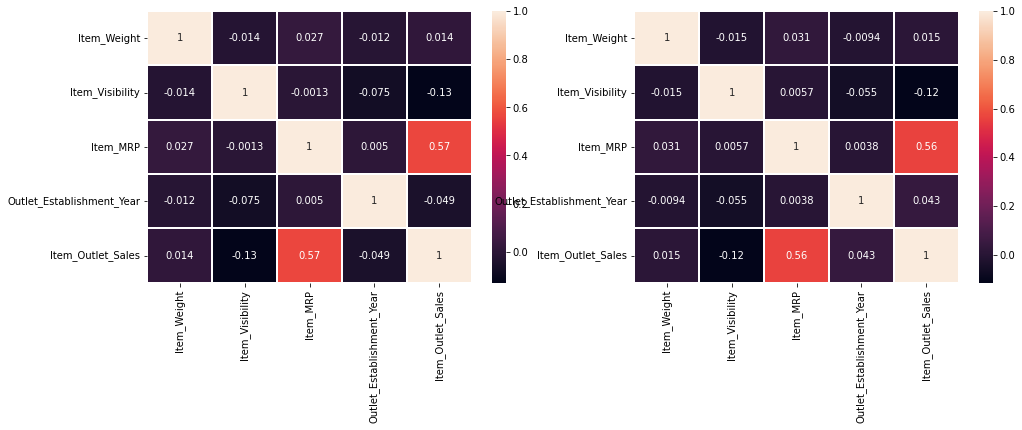

In [128]:
#heatmap
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.heatmap(numerical.corr(method = 'pearson'), cbar = True, annot = True,linewidths = 1)

plt.subplot(1,2,2)
sns.heatmap(numerical.corr(method = 'spearman'), cbar = True, annot = True,linewidths = 1)

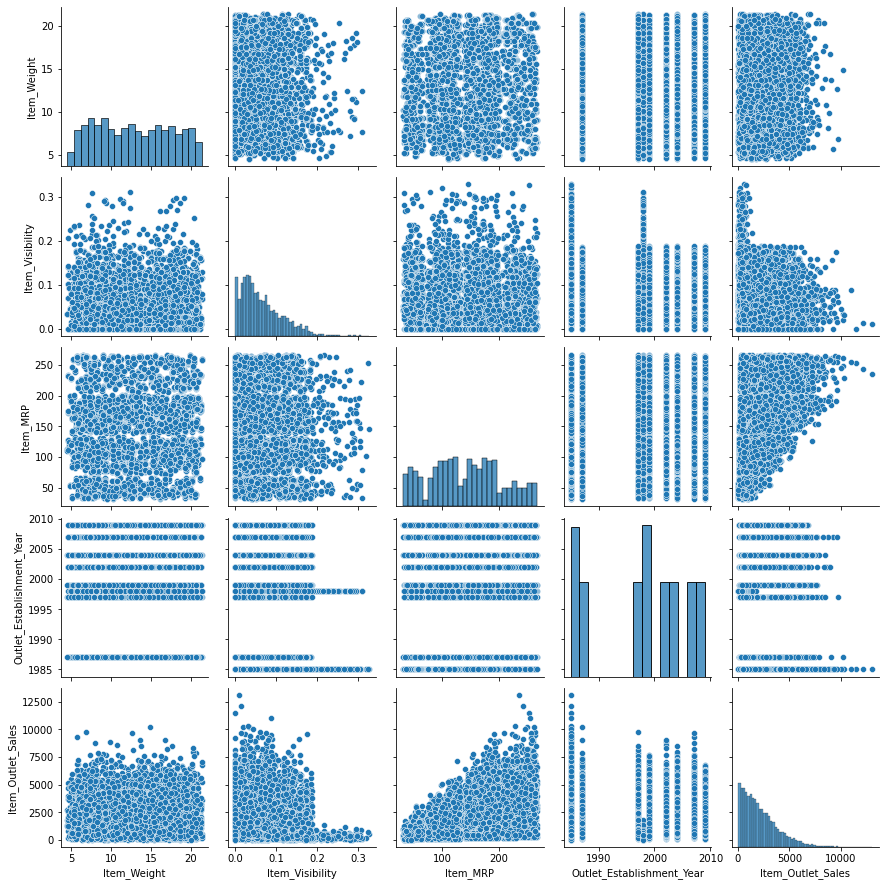

In [129]:
sns.pairplot(numerical)


**Observation:**
```
Item_MRP is somewhat correlated with Item_Outlet_Sales. So Item_MRP can be important feature for predicting Item_Outlet_Sales at particular store.
Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
Item weight and Item_Establishment_Year does not have any realationship with Item_Outlet_Sales
```



***7.2 Bivariate Analysis: Numerical and Categorical***
```
In this we are going to analyze our data with one categorical feature and a target variable(numerical) and also perform some hypothesis testing falling in this section.
```



***Hypothesis falling under this section.***
```
Are the items contain low fat have more sales than the items contain regular fat.
Are the stores with medium size have high Item Outlet sales than others.
Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.
Are the stores located in Tier 3 cities have more sales than other.
Are the Supermarket Type 1 type of stores have more sales than other type of stores.
```



In [131]:
categorical = data.select_dtypes(include = 'object')
categorical.dtypes.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

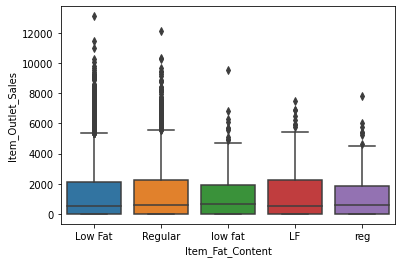

In [140]:
sns.boxplot(y=data['Item_Outlet_Sales'],x=data['Item_Fat_Content'],data=data)

***Observation:***
```
There is no significance difference with the Item Fat Content. But there may be if be treat 'low fat' , 'LF' as 'Low Fat' and 'reg' as 'Regular'
The distribution of Item Fat Content is slightly right skew.
Outliers shown in the boxplot is due to much difference in the Item sales of different Items.
```



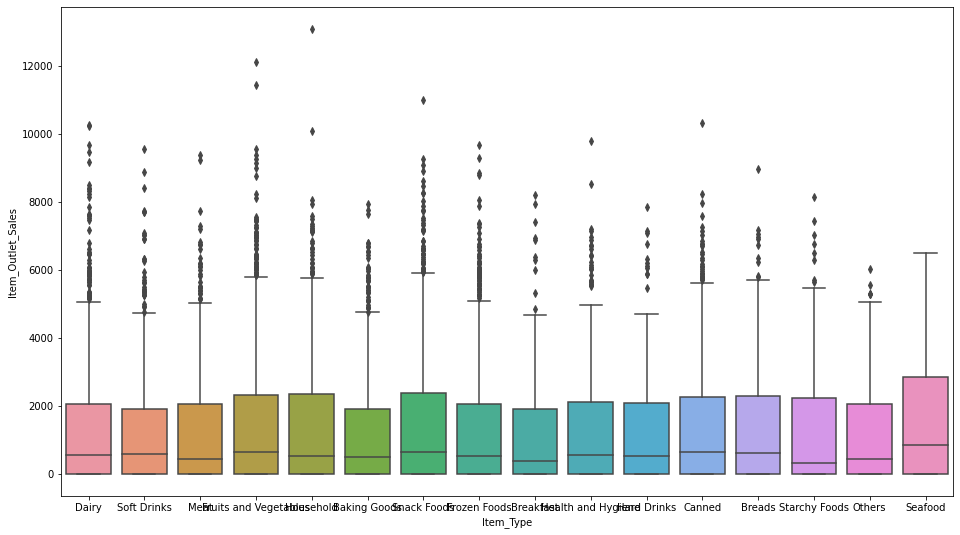

In [142]:
plt.figure(figsize=(16,9))
sns.boxplot(data=data, y=data['Item_Outlet_Sales'],x=data['Item_Type'])


***Observation***
```
There is a significance difference between Item sales of different item types.
Dairy products have the higher Item Outlet sales than others
```



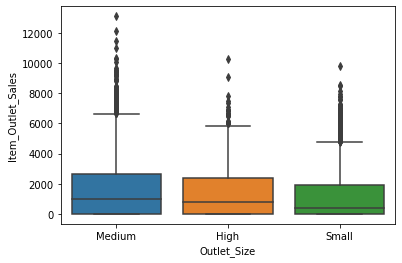

In [143]:
sns.boxplot(data=data,y=data['Item_Outlet_Sales'],x=data['Outlet_Size'])


***Observation:***
```
Yes there is a significance difference between Item Outlet Sales of stores with different Outlet Size.
Medium size stores have more Item Outlet sales than others, while the small size stores have the least Item Outlet sales.
Mean Item Outlet sales of the 'Medium' Outlet size is above 2500 while that of 'High' is below 2500 and 'Small' is of below 2000
```



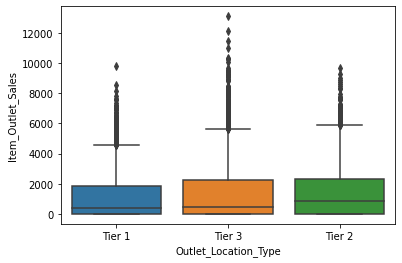

In [144]:
sns.boxplot(data=data,y=data['Item_Outlet_Sales'],x=data['Outlet_Location_Type'])

***Observation:***
```
There is a significance difference between the Item Outlet Sales of stores of different Outlet Location Type.
Tier 2 cities have most sales while Tier 1 cities least sales.
The average sale of Tier 2 cities is 2324 while that of Tier 2279.
```



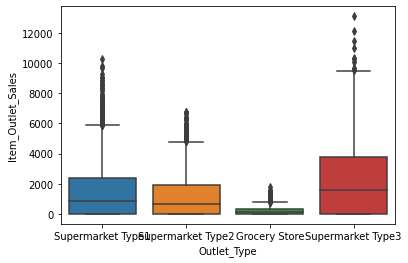

In [145]:
sns.boxplot(data=data,y=data['Item_Outlet_Sales'],x=data['Outlet_Type'])

***Observation:***
```
There is a significance difference between the Item Outlet Sales of stores of different Outlet Type.
No the supermarket Type 1 does not have the more sales than others
Supermarket type 3 have more sales than others and the average sales of the Supermarket Type 3 is 3694.
Grocery store has the least Item Outlet sales.
```



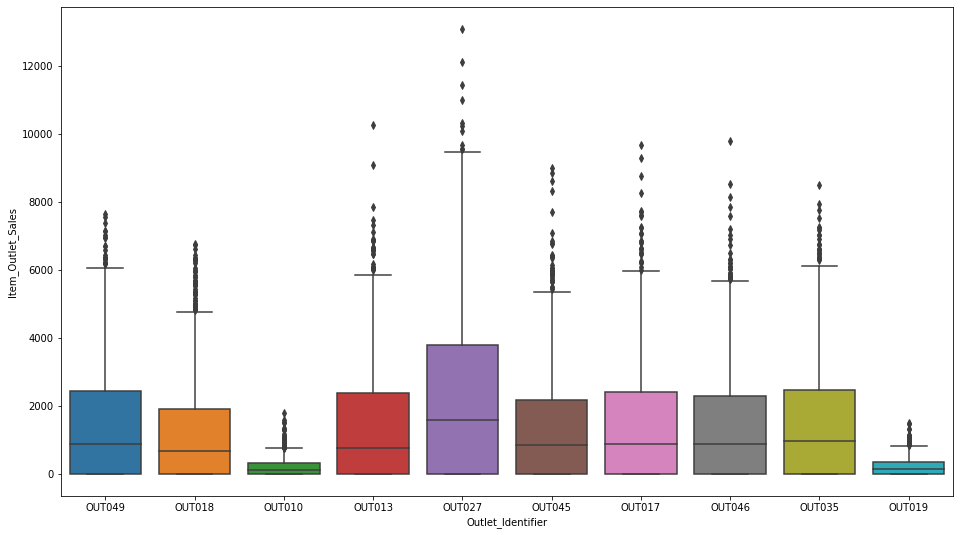

In [147]:
plt.figure(figsize=(16,9))
sns.boxplot(data=data,y=data['Item_Outlet_Sales'],x=data['Outlet_Identifier'])


**Observation:**
```
There is a significance difference on the Item Outlet Sales of different stores based on store Id i.e Outlet Identifier.
Sales of OUT049 comes from the items whose average sales lies between 200-1000.
```




**7.3 Missing Values**
```
During Univariate analysis we find that ItemWeight and Outlet Size coontains some missing values. So in this section we are going to find the relationship and information between the missing values of different features with other features
```



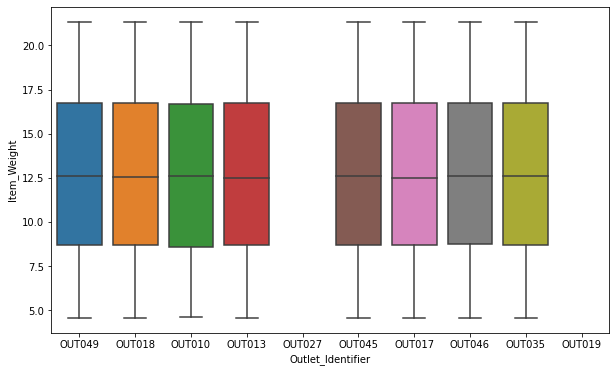

In [148]:
plt.figure(figsize = (10,6))
sns.boxplot(x=data['Outlet_Identifier'],y=data['Item_Weight'],data =data)


**Observation**
```
OUT027 and OUT019 does not show the plot, so it is confirm that the missing information of Item Weught comes from the store ID OUT027 and OUT019
```




**Inference**
```
Since Item weight of OUT027 and OUT019 have missing values, so let's check for the Outlet size.
```



In [46]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(data['Item_Weight'].isnull()))

Missing values: 2439
Missing values after immputation 0


In [47]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [48]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [49]:
#Get the first two characters of ID:
#data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
#data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
  #                                                           'NC':'Non-Consumable',
  #                                                           'DR':'Drinks'})
#data['Item_Type_Combined'].value_counts()

In [50]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [51]:
data['Outlet_Years'] = 2022 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Years, dtype: float64

In [52]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    434
Item_Fat_Content                 2
Item_Visibility              13688
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
Outlet_Years                     9
dtype: int64

In [53]:
data_num=data.select_dtypes(exclude='object')
data_num.columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')

In [54]:
data_col=data.select_dtypes(include='object')
data_col.columns 

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [55]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [56]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    434
Item_Fat_Content                 2
Item_Visibility              13688
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
Outlet_Years                     9
dtype: int64

In [57]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Item_Identifier'] = le.fit_transform(data['Item_Identifier'])
var_mod = [  'Item_Type', 'Outlet_Identifier', ]
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [58]:
#One Hot Coding:
data = pd.get_dummies(data, columns=[ 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [59]:
data.dtypes

Item_Identifier                    int64
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                          int64
Item_MRP                         float64
Outlet_Identifier                  int64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Outlet_Years                       int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Regular           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [60]:
data.shape

(14204, 22)

In [61]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,train,23,...,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,train,13,...,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,train,23,...,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.017834,6,182.0950,0,1998,732.3800,train,24,...,0,1,0,0,0,1,1,0,0,0
4,1297,8.93,0.009780,9,53.8614,1,1987,994.7052,train,35,...,1,0,0,0,0,1,0,1,0,0


In [62]:
import warnings
warnings.filterwarnings('ignore')
#Dropping converted columns:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Dividing into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Dropping unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Exporting files:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [63]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [64]:
print(train2.shape,test2.shape)

(8523, 19) (5681, 18)


In [65]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,249.8092,9,3735.1380,23,1,0,0,1,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,48.2692,3,443.4228,13,0,1,0,1,0,0,0,1,0,0,1,0
2,662,17.50,0.016760,141.6180,9,2097.2700,23,1,0,0,1,0,1,0,0,0,1,0,0
3,1121,19.20,0.017834,182.0950,0,732.3800,24,0,1,0,1,0,0,0,1,1,0,0,0
4,1297,8.93,0.009780,53.8614,1,994.7052,35,1,0,1,0,0,0,0,1,0,1,0,0


In [66]:
x_train= train2.drop(['Item_Outlet_Sales'], axis=1)
y_train = train2.Item_Outlet_Sales

In [67]:
print(x_train.shape,y_train.shape)

(8523, 18) (8523,)


In [68]:
#BUILDING MODELS
#LINEAR REGRESSION
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [69]:
lr_accuracy = round(regressor.score(x_train,y_train) * 100,2)
lr_accuracy

56.34

In [70]:
pred=regressor.predict(x_train)

In [71]:
from sklearn.metrics import mean_squared_error
print('RMSE of lr ', np.sqrt(mean_squared_error(y_train,regressor.predict(x_train))))

RMSE of lr  1127.4616613531348


In [72]:
from sklearn.linear_model import Lasso,Ridge

In [73]:
ls=Lasso()
rg=Ridge()
ls.fit(x_train,y_train)
rg.fit(x_train,y_train)

Ridge()

In [74]:
lr_accuracy = round(ls.score(x_train,y_train) * 100,2)
lr_accuracy

56.26

In [75]:
from sklearn.metrics import mean_squared_error
print('RMSE of ls ', np.sqrt(mean_squared_error(y_train,ls.predict(x_train))))

RMSE of ls  1128.5623490090043


In [76]:
lr_accuracy = round(rg.score(x_train,y_train) * 100,2)
lr_accuracy

56.34

In [77]:
from sklearn.metrics import mean_squared_error
print('RMSE of rg ', np.sqrt(mean_squared_error(y_train,rg.predict(x_train))))

RMSE of rg  1127.5231108082432


In [78]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rfg.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [79]:
lr_accuracy = round(rfg.score(x_train,y_train) * 100,2)
lr_accuracy

61.33

In [80]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

[10:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [81]:
lr_accuracy = round(rfg.score(x_train,y_train) * 100,2)
lr_accuracy

61.33